## **CRISP - DM Method:**

1. Business Understanding

2. Data Understanding

3. Data Preparation

4. Modelling

5. Evaluation

> Deployment

# 1. Business Understanding:

- Forecasting Transactions

- Regression Problem as predicting continous outcome

- Data over 3 years

- Pre Advised data quality is okay

# 2. Data Understanding

###Importing Data

In [2]:
import pandas as pd

In [4]:
path = 'regression.csv'

df = pd.read_csv(path)

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [5]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [ ]:
df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [7]:
for col in df.columns:
  print(col, '\t', len(df[col].unique()), '\t', df[col].unique())

Year 	 3 	 [2019 2020 2021]
Month 	 12 	 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 	 9 	 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 	 13 	 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 	 13 	 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 	 4 	 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 	 3956 	 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [ ]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [ ]:
#summary statistics
df.describe(include='object')

,Month,Cost Centre,Account Description,Account Type
count,4212,4212,4212,4212
unique,12,9,13,4
top,Jan,CC100,Product Sales,Expense
freq,351,468,324,1620


In [ ]:
df.dtypes
#Categorical features = month, cost centre, account description, account type

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

### Generating Dataset Summary Profile

In [ ]:
!pip install pandas-profiling ydata-profiling
from ydata_profiling import ProfileReport


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=26e0eef2a4af12d7e2318e593c6639d61482d6dfd4cb3f5628db8d7226650a89
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
analysis_df = pd.read_csv('regression.csv')

In [ ]:
profile = ProfileReport(analysis_df, title="Profiling Report")

In [ ]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###**Visualize Data**

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

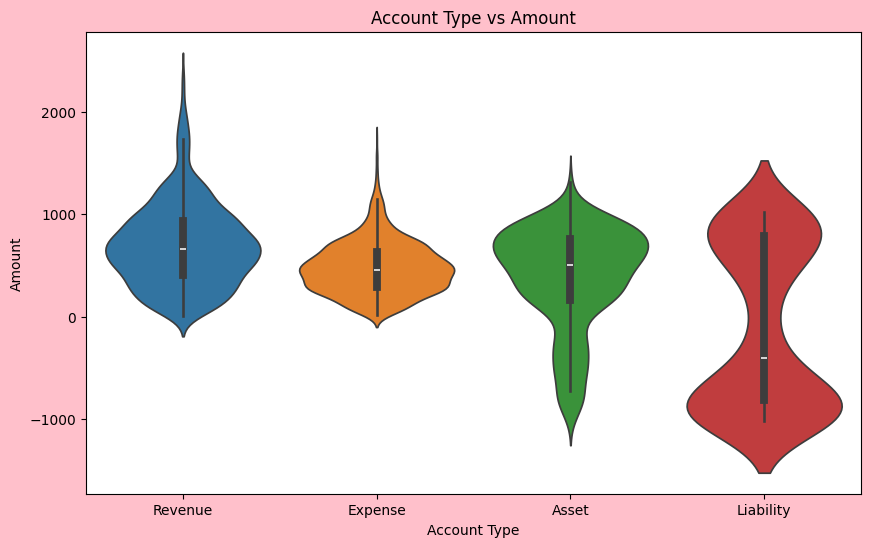

In [ ]:
#Check the spread of each transaction across account type, via violin plot
plt.figure(figsize=(10,6), facecolor='pink')
sns.violinplot(x='Account Type', y='Amount', hue='Account Type', data=df).set_title('Account Type vs Amount')
plt.show()

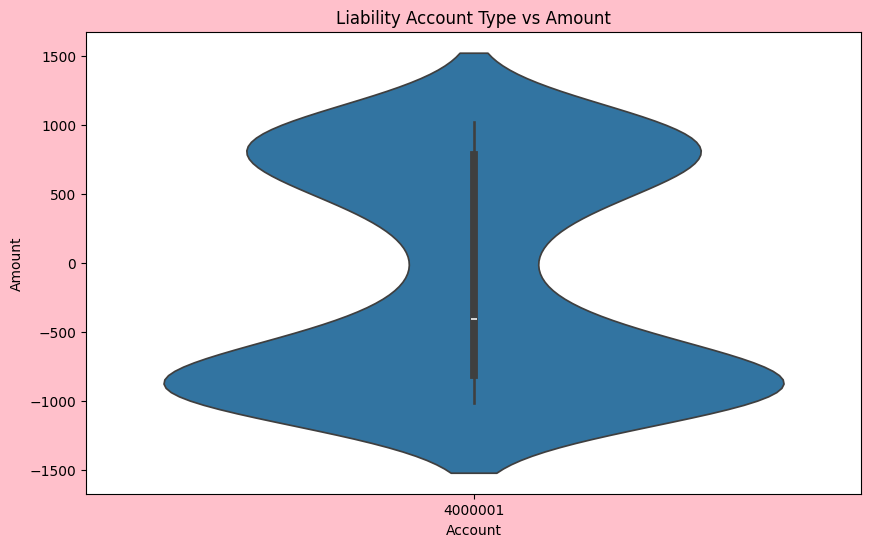

In [ ]:
#Check the spread of transaction in specific accont type, via violin plot
#Checking for liability account from account type        data=df[df['Account Type'] == 'Liability']
plt.figure(figsize=(10,6), facecolor='pink')
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability Account Type vs Amount')
plt.show()

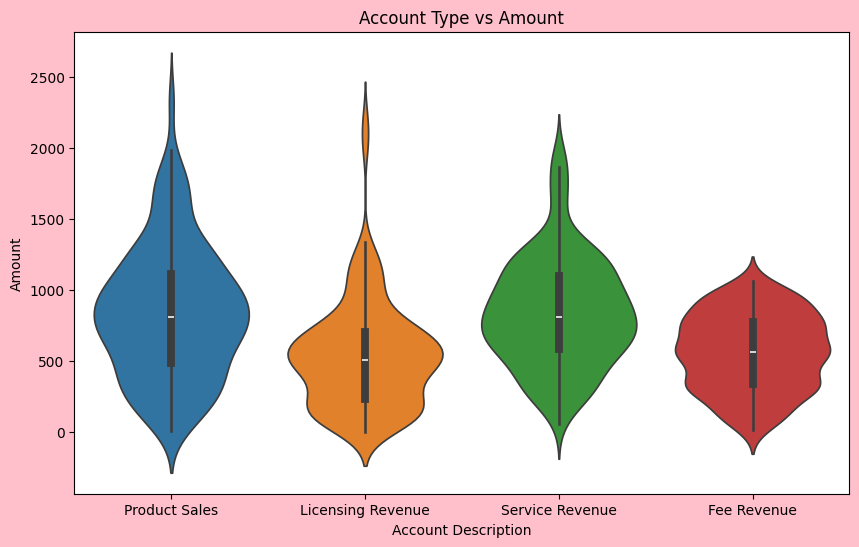

In [ ]:
plt.figure(figsize=(10,6), facecolor='pink')
sns.violinplot(x='Account Description', y='Amount', hue='Account Description', data=df[df['Account Type']=='Revenue']).set_title('Account Type vs Amount')
plt.show()

### *Review Trend Across Data*

- Convert Date types

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1


In [9]:
#numeric to month mapping dictionary for 12 months

monthmap= {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}


In [10]:
#Create new column 'Period' to convert "month" column to int by monthmap dict
#For loop lambda x: monthmap, meanining for each individual x values in X, monthma> > xzadp[x]

df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [11]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121,12
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056,12
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478,12
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680,12
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000,12


In [12]:
df.dtypes

,0
Year,int64
Month,object
Cost Centre,object
Account,int64
Account Description,object
Account Type,object
Amount,float64
Period,int64


In [13]:
#Looking at a specific value in a column in df

df[df['Month']=='Jul'].head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
702,2019,Jul,CC100,1000000,Product Sales,Revenue,624.105,7
703,2019,Jul,CC100,1000001,Licensing Revenue,Revenue,264.495,7
704,2019,Jul,CC100,1000002,Service Revenue,Revenue,783.616,7
705,2019,Jul,CC100,1000004,Fee Revenue,Revenue,558.152,7
706,2019,Jul,CC100,2000000,Cost of Good Sold,Expense,480.380,7


In [14]:
#Create date column to encode irregular formatted day column
df['Day'] = 1

In [15]:
#String together all these columns to convert to date
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

In [16]:
import pandas as pd

# Assuming your DataFrame is named 'df' and has columns 'Year', 'Period', and 'Day'

# Combine the columns into a single 'Date' column as a string
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

# Convert the 'Date' column to datetime objects, use the correct format string
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # Changed format string to match the date format in the 'Date' column

# Extract numerical features from the datetime object
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# ... (add other relevant features like day of week, quarter, etc. if needed)

# Optionally drop the original 'Date' column if you no longer need it
# df = df.drop('Date', axis=1)

In [17]:
df.dtypes

,0
Year,int32
Month,int32
Cost Centre,object
Account,int64
Account Description,object
Account Type,object
Amount,float64
Period,int64
Day,int32
Date,datetime64[ns]


In [18]:
#using to_datetime func from pandas to convert str(obj) to numerical
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,1,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,1,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,1,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,1,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,1,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [19]:
#Now truly a date time column
df.dtypes

,0
Year,int32
Month,int32
Cost Centre,object
Account,int64
Account Description,object
Account Type,object
Amount,float64
Period,int64
Day,int32
Date,datetime64[ns]


**Visualizing [Revenue] first**

> Revnue filtered from Account Type using

 df[df['Account Type']=='Revenue

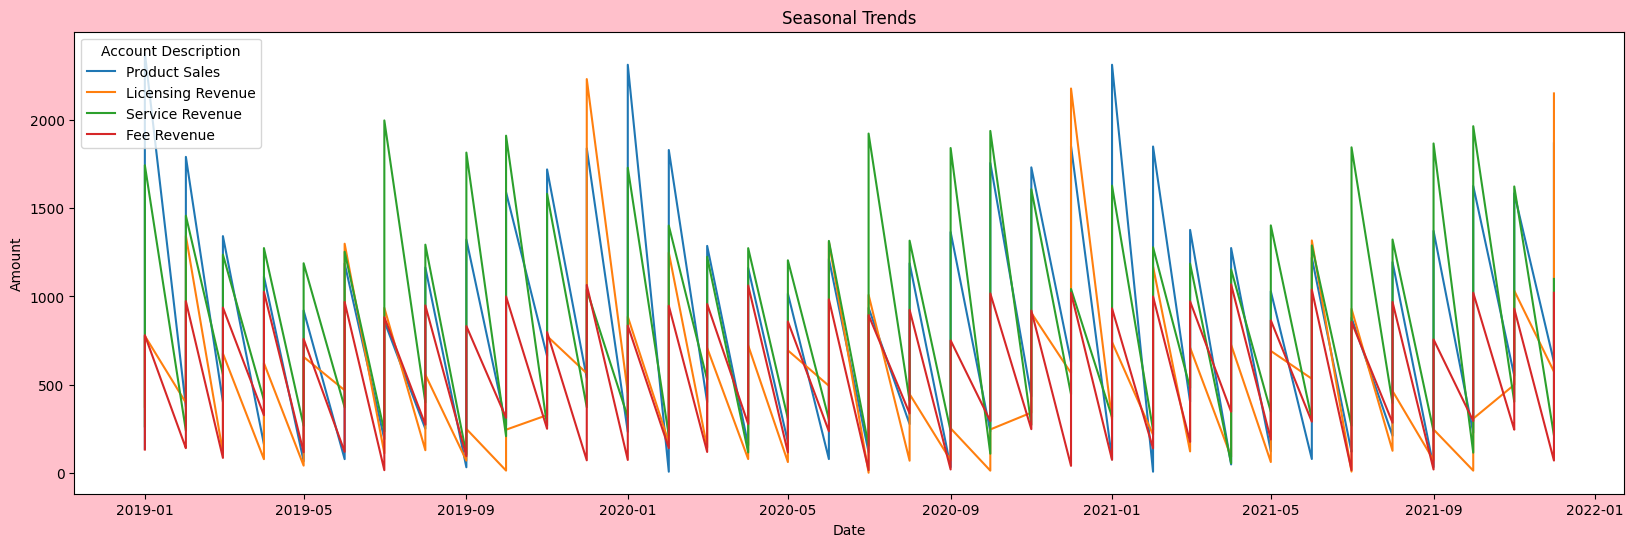

In [ ]:
plt.figure(figsize=(20,6), facecolor='pink')
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']== 'Revenue']).set_title('Seasonal Trends')
plt.show()

> **Product Sales Filtered from Account Description**

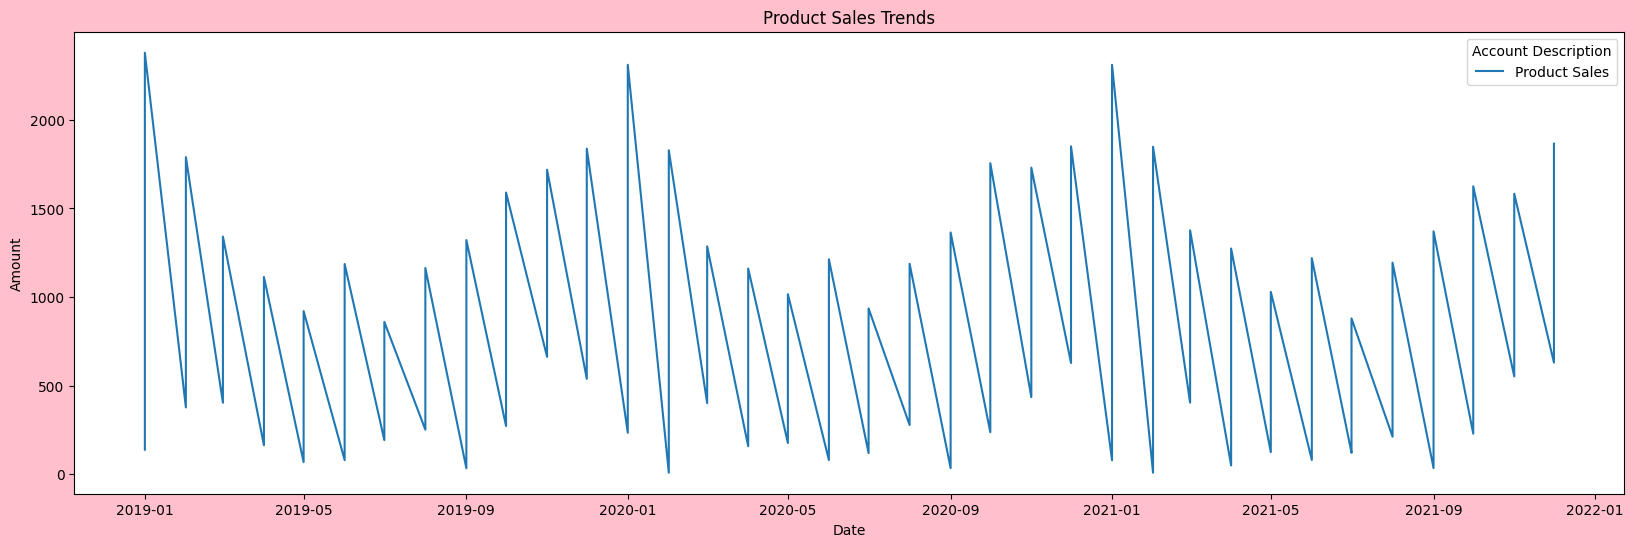

In [ ]:
#Product Sales
plt.figure(figsize=(20,6), facecolor='pink')
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']== 'Product Sales']).set_title('Product Sales Trends')
plt.show()

> **Service Revenue Filtered from Account Description**

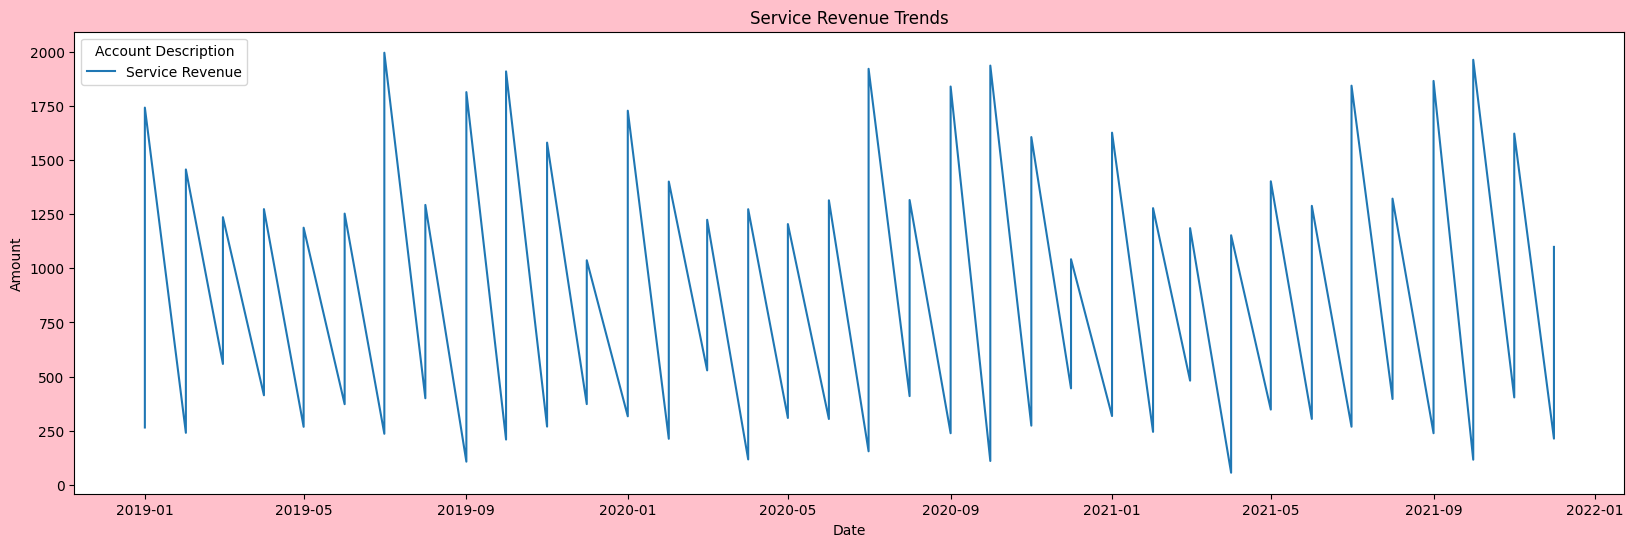

In [ ]:
#Service Sales

plt.figure(figsize=(20,6), facecolor='pink')
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']== 'Service Revenue']).set_title('Service Revenue Trends')
plt.show()

 ***Analysis: Service Revenue not as seasonal as Product Sales***

## Correlation

In [20]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,1,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,1,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,1,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,1,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,1,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [21]:
df.dtypes

,0
Year,int32
Month,int32
Cost Centre,object
Account,int64
Account Description,object
Account Type,object
Amount,float64
Period,int64
Day,int32
Date,datetime64[ns]


                 Year         Month       Account    Amount        Period  Day
Year     1.000000e+00 -5.695624e-13 -5.466737e-15  0.014750 -5.695624e-13  NaN
Month   -5.695624e-13  1.000000e+00  2.276590e-16  0.024473  1.000000e+00  NaN
Account -5.466737e-15  2.276590e-16  1.000000e+00 -0.417946  2.315721e-16  NaN
Amount   1.475040e-02  2.447256e-02 -4.179456e-01  1.000000  2.447256e-02  NaN
Period  -5.695624e-13  1.000000e+00  2.315721e-16  0.024473  1.000000e+00  NaN
Day               NaN           NaN           NaN       NaN           NaN  NaN


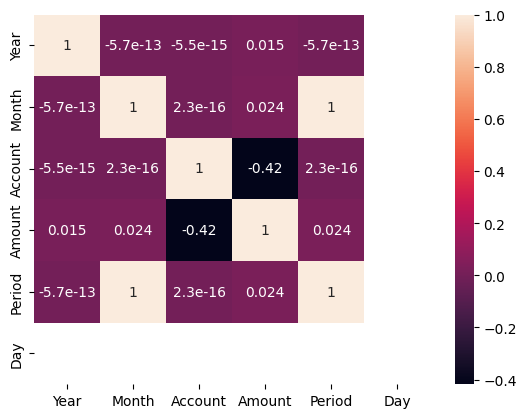

In [22]:
#checking for correlation in features
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

corr = numerical_df.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
df['Account Type'].unique()

array(['Revenue', 'Expense', 'Asset', 'Liability'], dtype=object)

**Data Transformation:**

> Convert all account values to columns by get dummies

In [23]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,False,False,False,False,False,False,False,False,True,False,False,False,False
4208,False,False,False,False,False,False,False,False,False,True,False,False,False
4209,False,False,False,False,False,False,False,False,False,False,True,False,False
4210,False,False,False,False,False,False,False,False,False,False,False,True,False


In [24]:
#Join new created dummy data frame with regular dataframe, for next step abstraction
df.join(pd.get_dummies(df['Account']))

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date,...,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,2019,1,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01,...,False,False,False,False,False,False,False,False,False,False
1,2019,1,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01,...,False,False,False,False,False,False,False,False,False,False
2,2019,1,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01,...,False,False,False,False,False,False,False,False,False,False
3,2019,1,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01,...,True,False,False,False,False,False,False,False,False,False
4,2019,1,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,2021,12,CC302,2000005,Purchases,Expense,698.121,12,1,2021-12-01,...,False,False,False,False,False,True,False,False,False,False
4208,2021,12,CC302,3000000,Cash at Bank,Asset,-282.056,12,1,2021-12-01,...,False,False,False,False,False,False,True,False,False,False
4209,2021,12,CC302,3000001,Inventory,Asset,537.478,12,1,2021-12-01,...,False,False,False,False,False,False,False,True,False,False
4210,2021,12,CC302,3000002,Accounts Receivable,Asset,1152.680,12,1,2021-12-01,...,False,False,False,False,False,False,False,False,True,False


*Loop through and applying transformation*

In [25]:
corrdict = {}


#Join data frame with new get dummies
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
   corrdict[key] = {int(row['Account']):row['Amount']}

In [26]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,1,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,1,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,1,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,1,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,1,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [27]:
corrdict

{0: {1000000: 1344.051},
 1: {1000001: 480.968},
 2: {1000002: 650.82},
 3: {1000004: 339.36},
 4: {2000000: 1125.328},
 5: {2000001: 412.088},
 6: {2000002: 259.488},
 7: {2000003: 376.697},
 8: {2000005: 1105.277},
 9: {3000000: 476.713},
 10: {3000001: 980.0},
 11: {3000002: 385.275},
 12: {4000001: 980.0},
 13: {1000000: 1296.06},
 14: {1000001: 459.764},
 15: {1000002: 512.169},
 16: {1000004: 732.538},
 17: {2000000: 1404.449},
 18: {2000001: 584.214},
 19: {2000002: 306.435},
 20: {2000003: 318.227},
 21: {2000005: 1531.884},
 22: {3000000: 464.197},
 23: {3000001: 980.0},
 24: {3000002: 491.607},
 25: {4000001: 200.0},
 26: {1000000: 244.447},
 27: {1000001: 776.767},
 28: {1000002: 872.102},
 29: {1000004: 690.433},
 30: {2000000: 53.563},
 31: {2000001: 529.574},
 32: {2000002: 450.893},
 33: {2000003: 454.857},
 34: {2000005: 43.042},
 35: {3000000: -296.261},
 36: {3000001: 980.0},
 37: {3000002: 158.931},
 38: {4000001: -980.0},
 39: {1000000: 994.789},
 40: {1000001: 588.

> **Conver coordict to DataFrame:**

In [ ]:
#To create dataframe from a dictionary
pd.DataFrame(corrdict)

,0,1,2,3,4,5,6,7,8,9,...,4202,4203,4204,4205,4206,4207,4208,4209,4210,4211
1000000,1344.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000001,NaN,480.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002,NaN,NaN,650.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000004,NaN,NaN,NaN,339.36,NaN,NaN,NaN,NaN,NaN,NaN,...,1020.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000000,NaN,NaN,NaN,NaN,1125.328,NaN,NaN,NaN,NaN,NaN,...,NaN,680.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000001,NaN,NaN,NaN,NaN,NaN,412.088,NaN,NaN,NaN,NaN,...,NaN,NaN,701.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000002,NaN,NaN,NaN,NaN,NaN,NaN,259.488,NaN,NaN,NaN,...,NaN,NaN,NaN,427.631,NaN,NaN,NaN,NaN,NaN,NaN
2000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.697,NaN,NaN,...,NaN,NaN,NaN,NaN,540.06,NaN,NaN,NaN,NaN,NaN
2000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1105.277,NaN,...,NaN,NaN,NaN,NaN,NaN,698.121,NaN,NaN,NaN,NaN
3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.713,...,NaN,NaN,NaN,NaN,NaN,NaN,-282.056,NaN,NaN,NaN


In [28]:
#Another way to create dataframe from a dictionary, .T.fillna(0)
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [29]:
corrdf

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


In [30]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


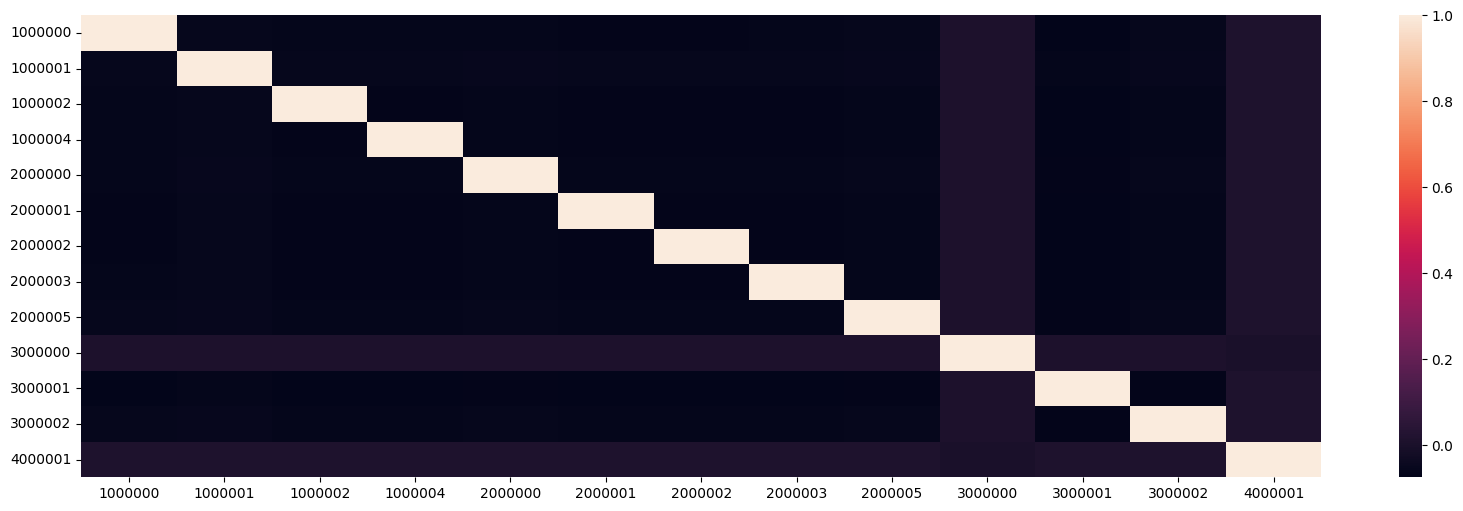

In [31]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr())
plt.show()

*Some relationship between accounnt 3000000, and 400000* indicated by strong purple hue


In [32]:
df[df['Account']==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,1,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,1,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,1,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,1,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,1,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,12,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,12,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,12,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,12,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


In [ ]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Day,Period,Date
12,2019,1,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,1,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,1,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,1,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,1,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,12,CC201,4000001,Accounts Payable,Liability,804.0,1,12,2021-12-01
4172,2021,12,CC202,4000001,Accounts Payable,Liability,-1018.0,1,12,2021-12-01
4185,2021,12,CC300,4000001,Accounts Payable,Liability,-1020.0,1,12,2021-12-01
4198,2021,12,CC301,4000001,Accounts Payable,Liability,-612.0,1,12,2021-12-01


# 3. Data Preparation

> Dropping columns with pandas

> Fixind dtypes using .astype()

> One-Hot encode data using .get_dummies()

In [33]:
import numpy as np

In [34]:
#currently printing from the account unique array
for account in df['Account'].unique():
  print(account)

1000000
1000001
1000002
1000004
2000000
2000001
2000002
2000003
2000005
3000000
3000001
3000002
4000001


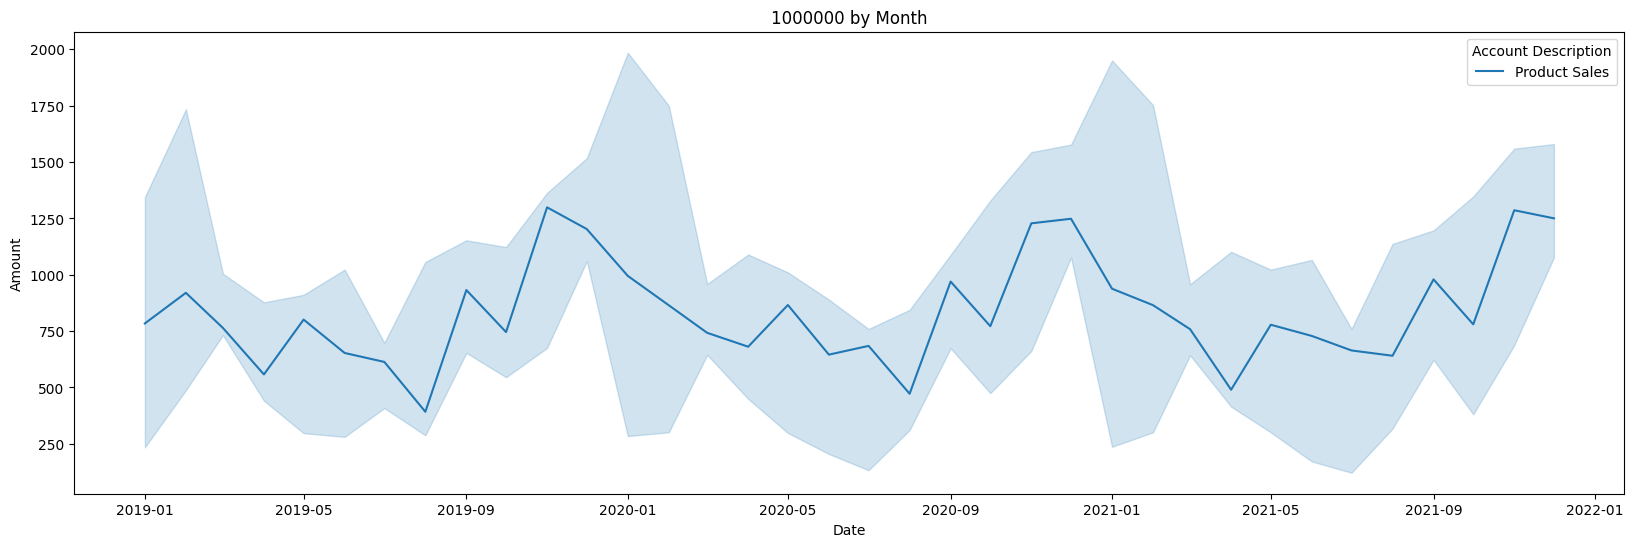

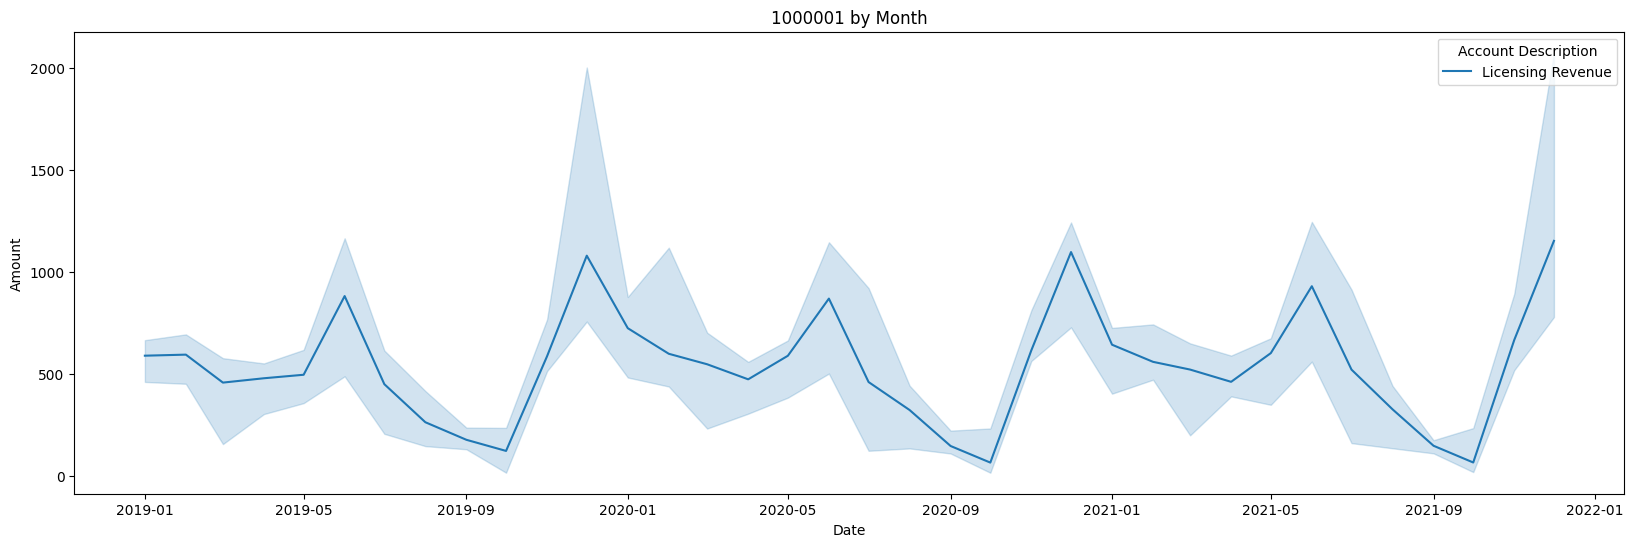

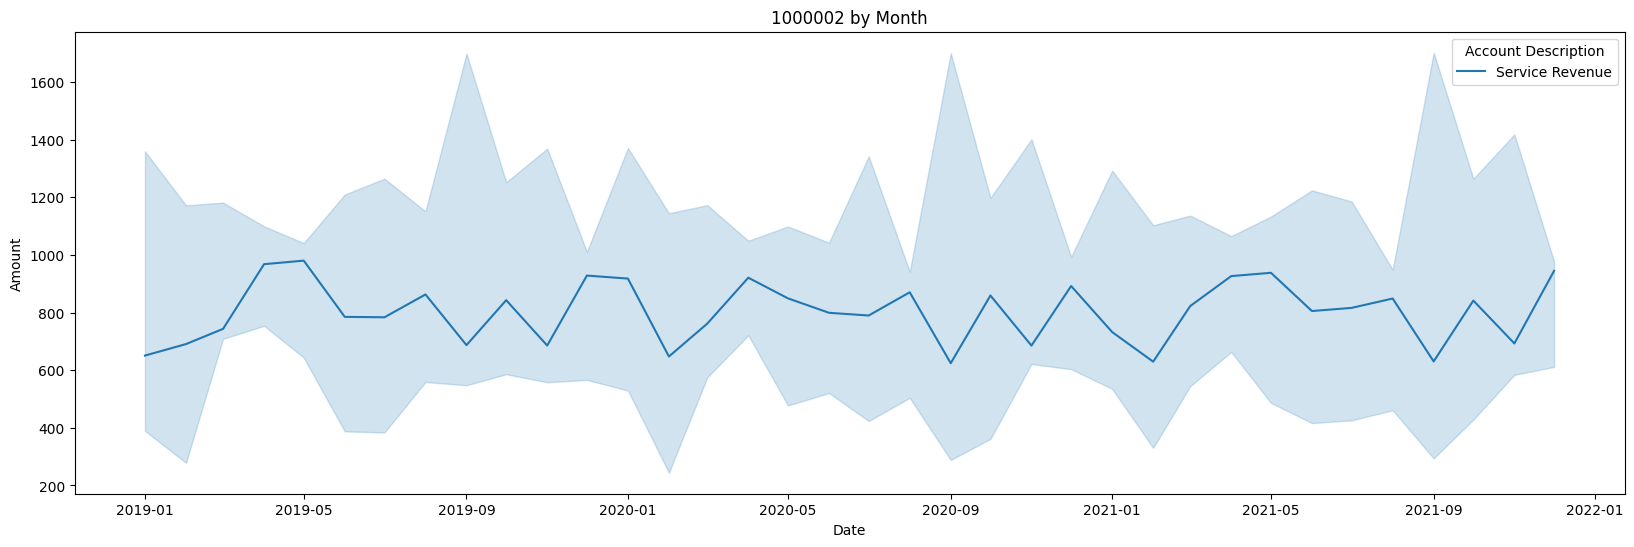

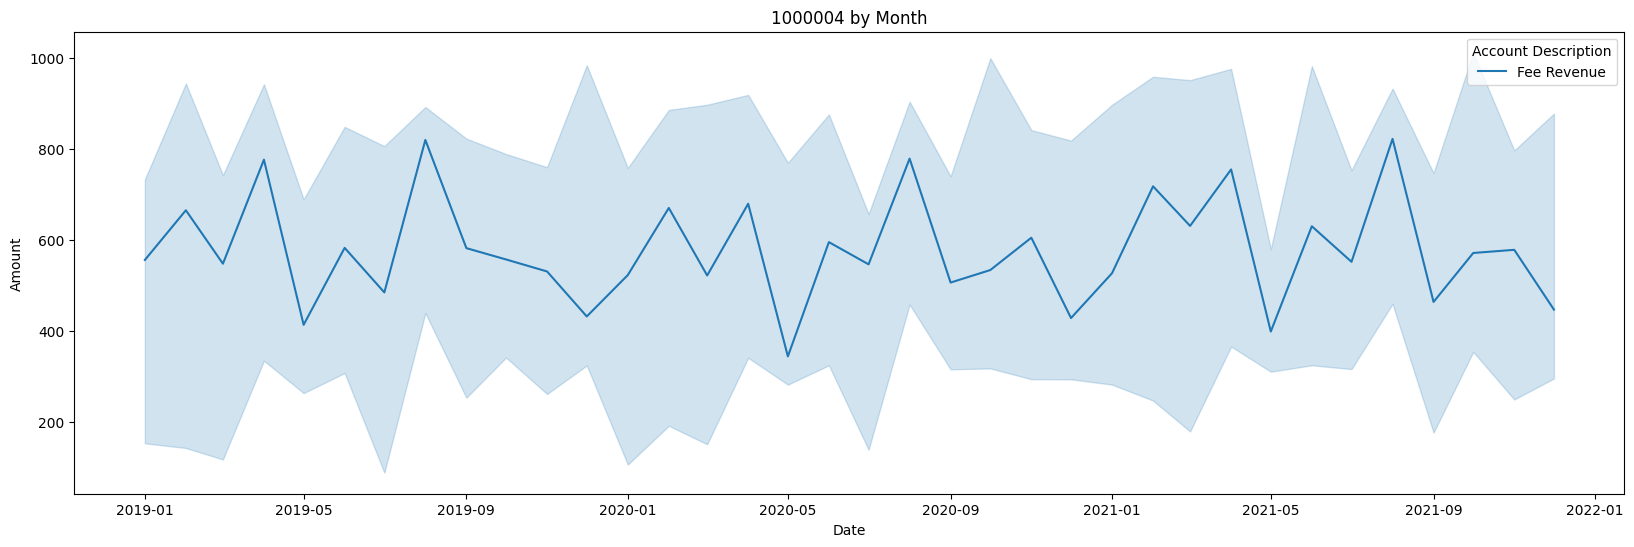

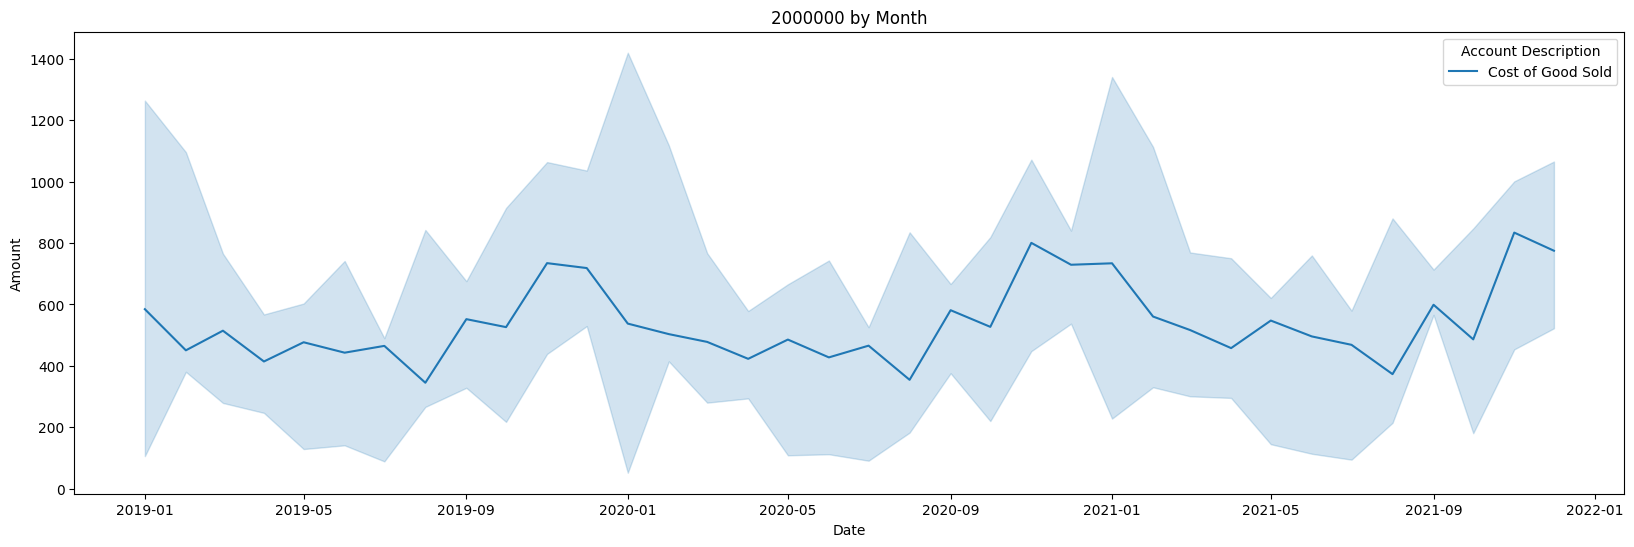

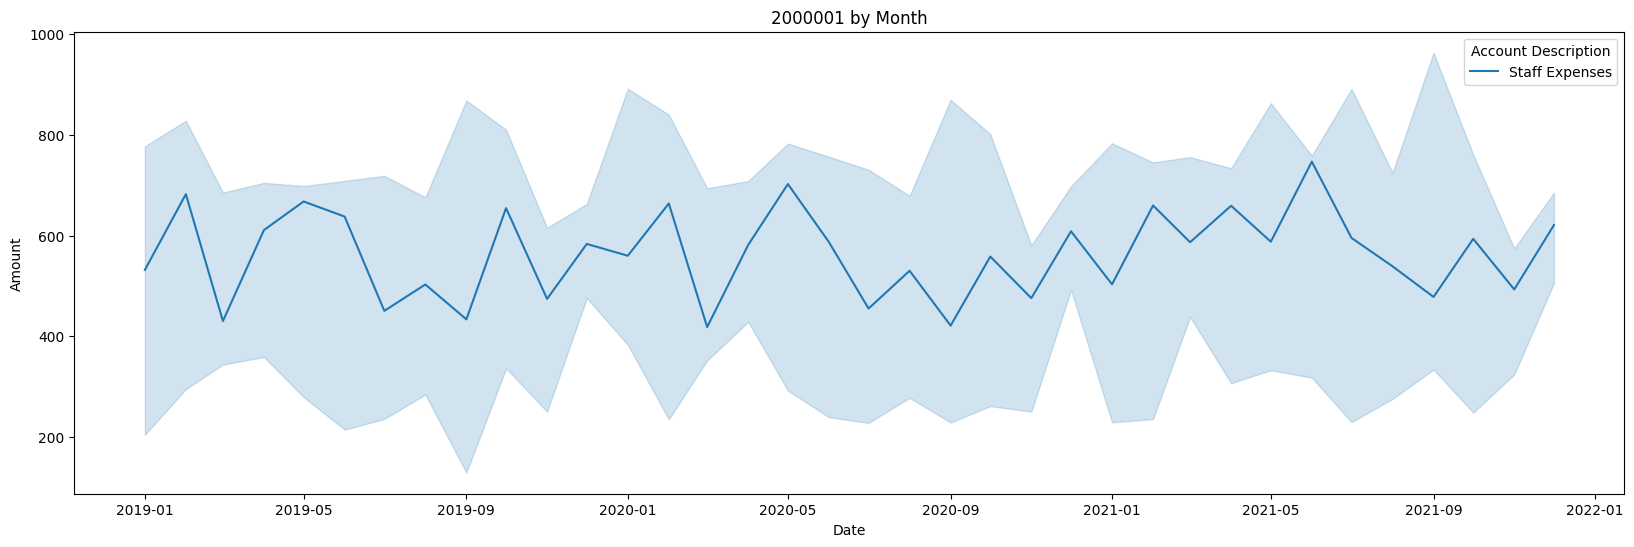

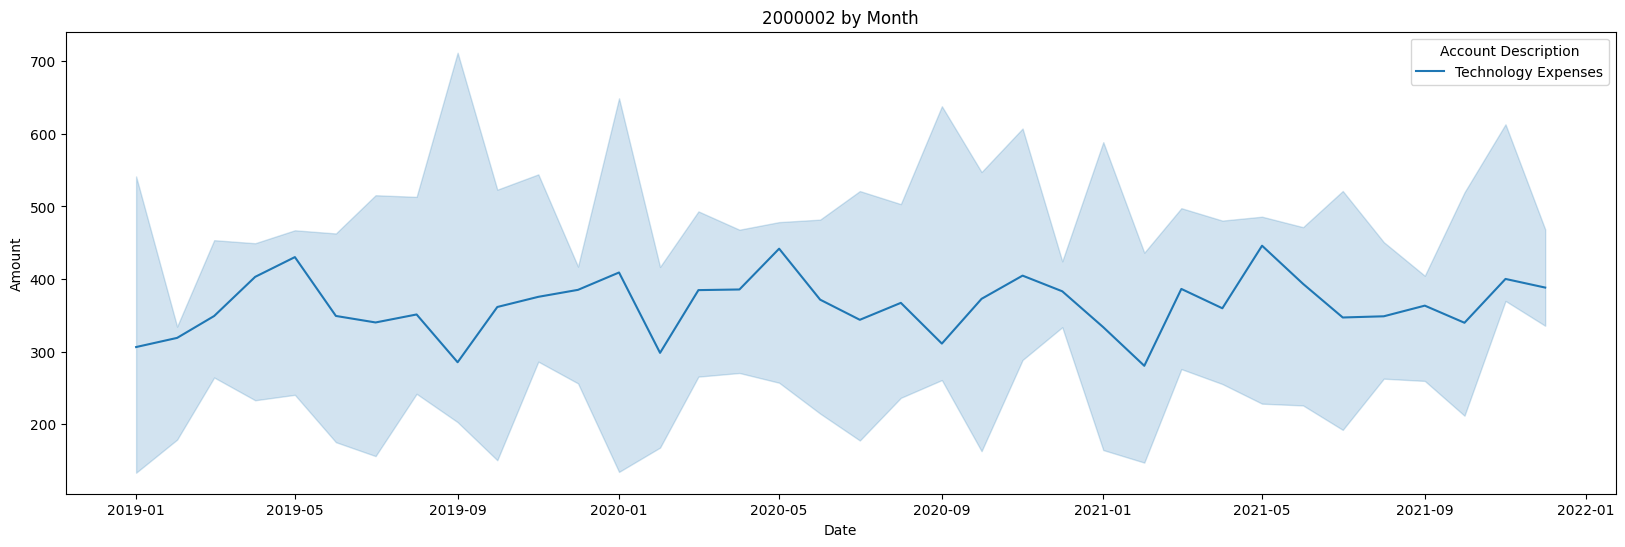

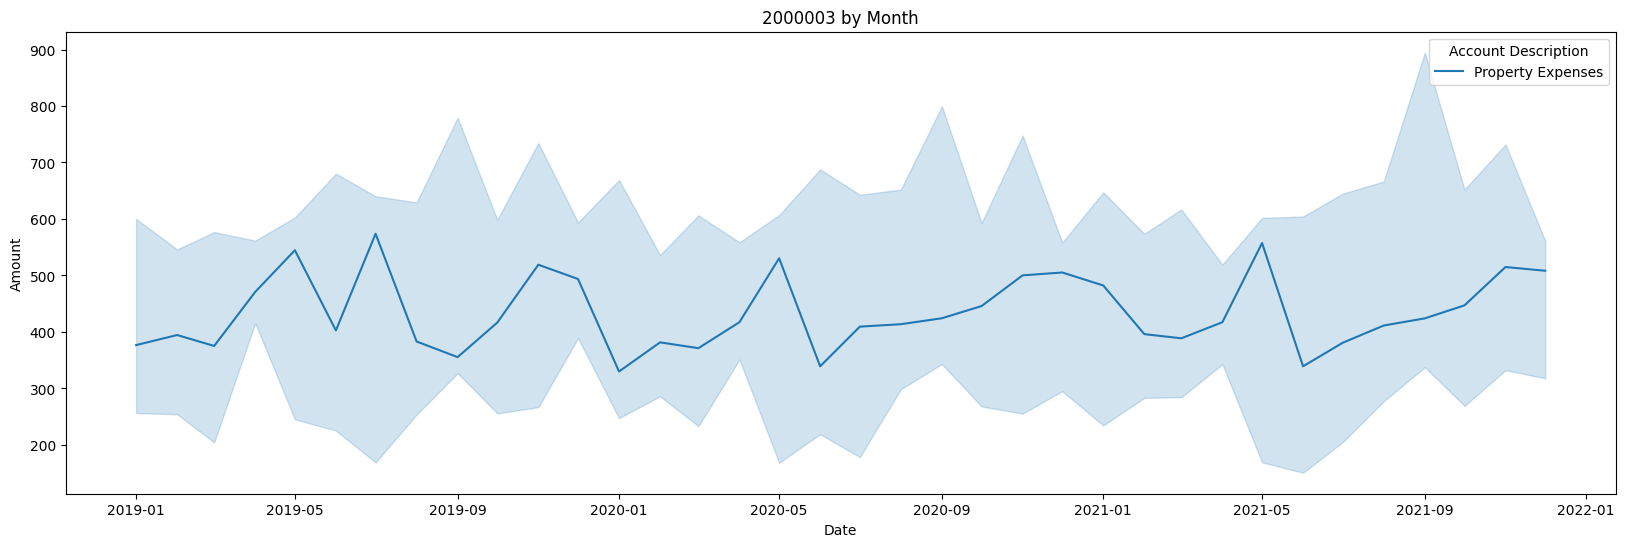

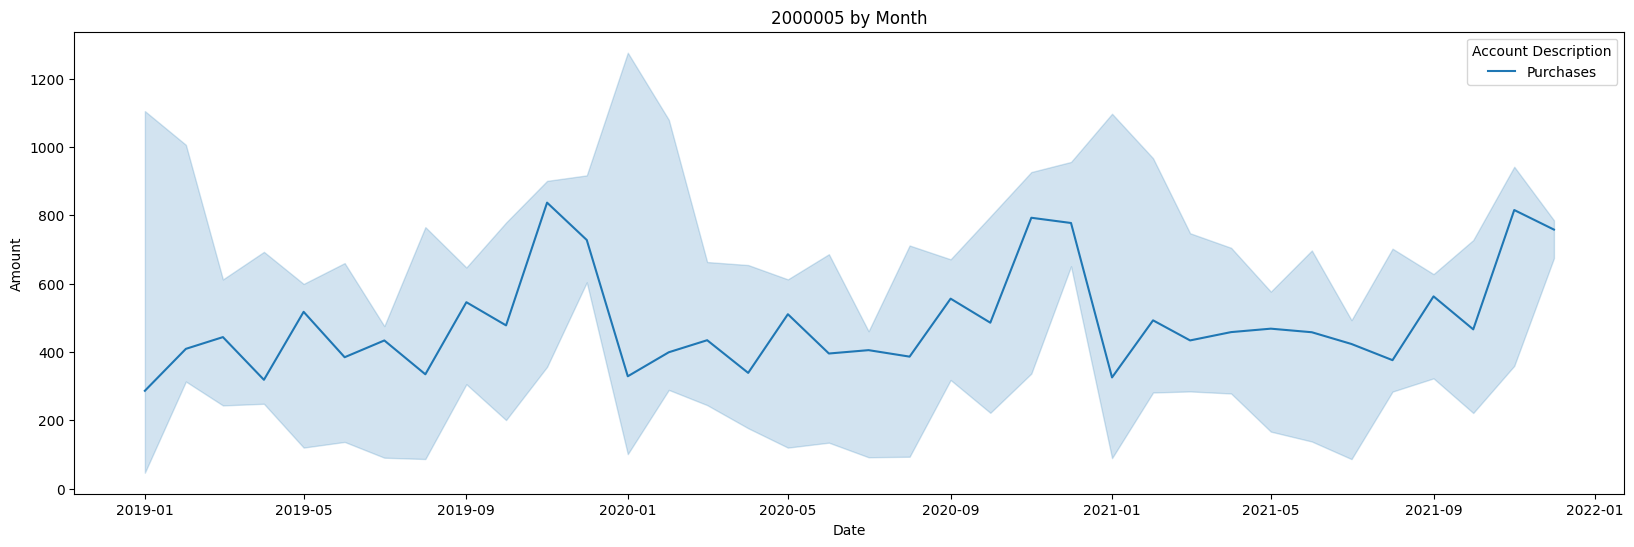

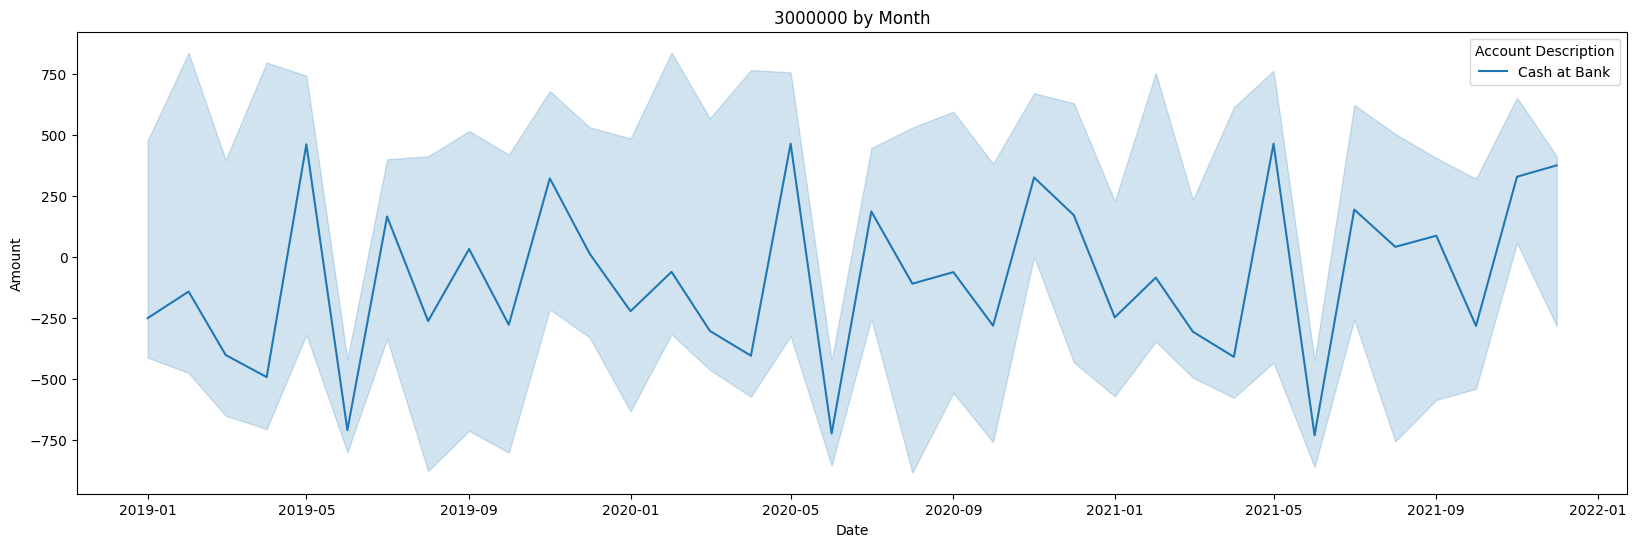

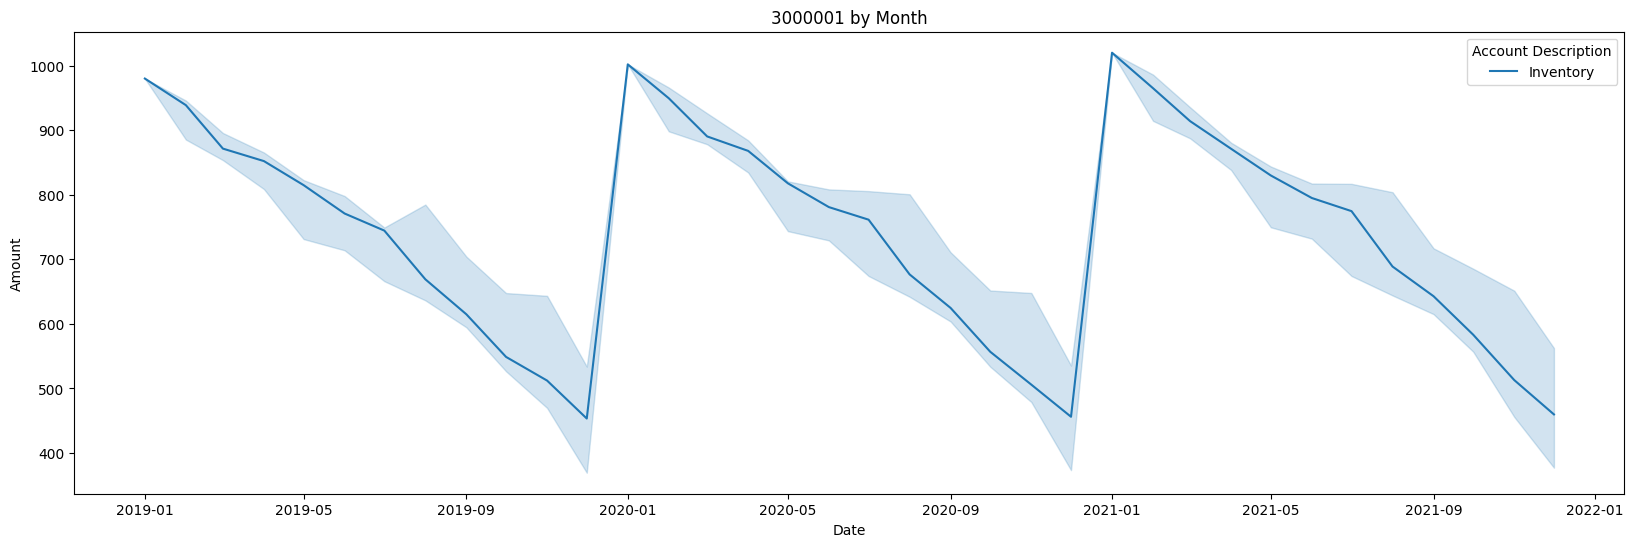

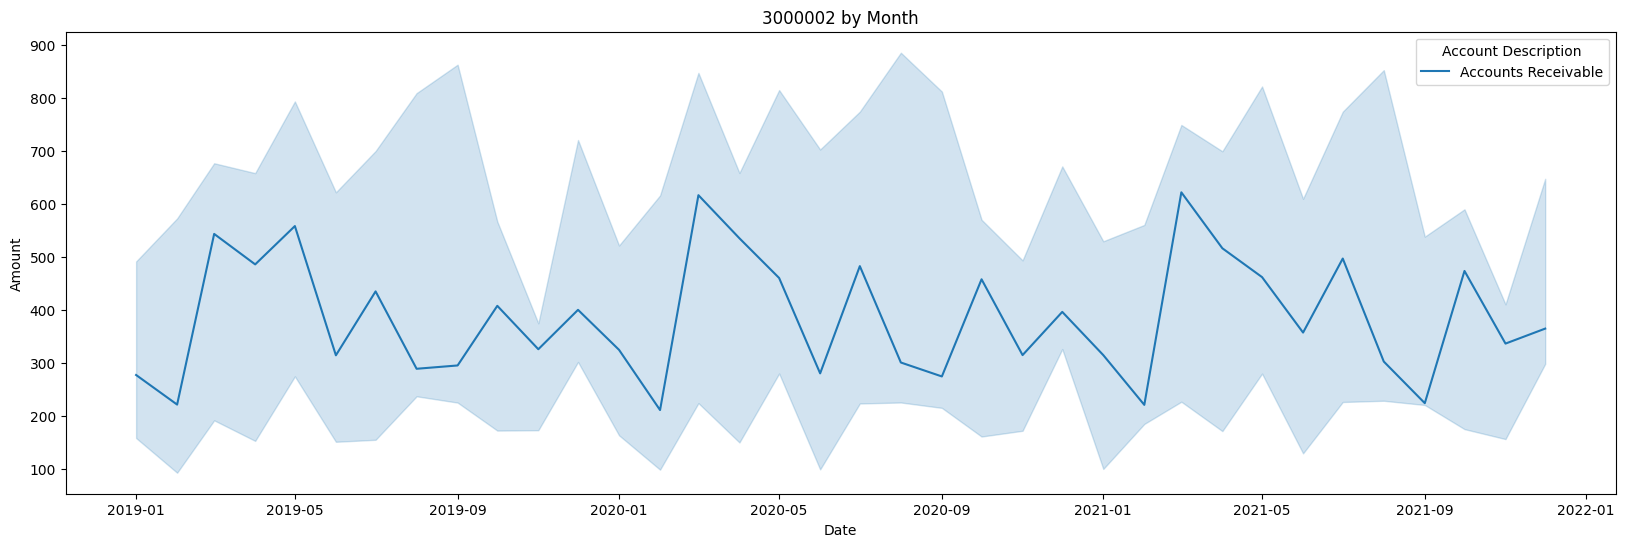

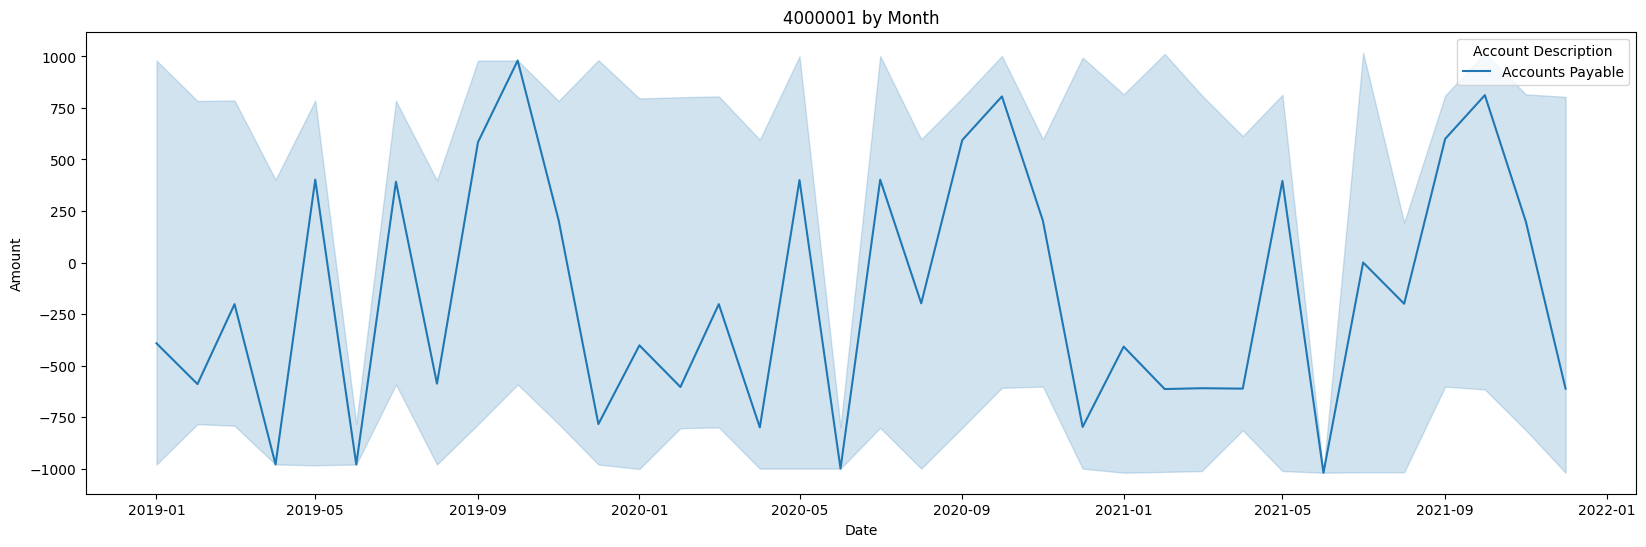

In [35]:
for account in df['Account'].unique():
  plt.figure(figsize=(20, 6))
  sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data = df[df['Account']==account]).set_title('{} by Month'.format(account))
  plt.show()

* **Inventory account (3000001)** shows a different seasonality in trend compared to other accounts.

*For the sakes of our model, this could be outlier and therefor should be stripped from the data.*

In [36]:
#filterring Inventory account i.e. 3000001 (outlier)

df = df[df['Account']!= 3000001]

In [37]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001])



###Convert Dtypes To Correct Format

In [38]:
df.dtypes

,0
Year,int32
Month,int32
Cost Centre,object
Account,int64
Account Description,object
Account Type,object
Amount,float64
Period,int64
Day,int32
Date,datetime64[ns]


> **Make year and account an object data type, and drop Period/Day/Date**

In [39]:
#Append ACC string to all account values to represent account
df['Account'] = 'ACC' + df['Account'].astype(str)

In [40]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,1,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,1,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,1,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,1,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,1,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [41]:
df.dtypes

,0
Year,int32
Month,int32
Cost Centre,object
Account,object
Account Description,object
Account Type,object
Amount,float64
Period,int64
Day,int32
Date,datetime64[ns]


*Account is now converted to string.*

In [42]:
#Convert year to String / Object to represented as categorical variable
df['Year'] = df['Year'].astype(str)

In [43]:
df.dtypes

,0
Year,object
Month,int32
Cost Centre,object
Account,object
Account Description,object
Account Type,object
Amount,float64
Period,int64
Day,int32
Date,datetime64[ns]


*Year is now converted to an object.*

### Dropping Analysis Fields

***The Period, Day and Date columns need to be dropped as the information is captured alreday by Year, and Month columns.***

In [ ]:
#df = df.drop(columns=['Acc'])

In [44]:
#Date already set apart in beinning so removing day/period columns
df.drop(columns=['Period', 'Day', 'Date'], axis=1, inplace=True)


*Account description is a column holds duplicaate information as Account columns*

- Checkin if number of values in either columns are same
- Append together and check if number of unique values
- If all same then drop Account description

In [45]:
len(df['Account'].unique())

12

In [ ]:
len(df['Account Description'].unique())

12

In [46]:
#Combine both account and account description to single new column "AccountVal"
df['AccountVal'] = df['Account'] + df['Account Description']

In [ ]:
len(df['AccountVal'].unique())

12

In [49]:
#df.drop(columns='Account Description', inplace=True)

In [48]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,1,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,1,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,1,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,1,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,1,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


### Converting Categorical Variables to numeric using One-Hot-Encoding

Last step for data preparation, one-hot-encoding

Converts categorical columns to feature columns interpretable by machine learning models

Makes unique column for each value in categorical features columns

In [53]:
df.drop(columns='Month', axis=1, inplace=True)

In [65]:
df.dtypes

,0
Year,object
Cost Centre,object
Account,object
Account Description,object
Account Type,object
Amount,float64
AccountVal,object


In [66]:
df = pd.get_dummies(df)

In [67]:
df

,Amount,Year_2019,Year_2020,Year_2021,Cost Centre_CC100,Cost Centre_CC101,Cost Centre_CC102,Cost Centre_CC200,Cost Centre_CC201,Cost Centre_CC202,...,AccountVal_ACC1000002Service Revenue,AccountVal_ACC1000004Fee Revenue,AccountVal_ACC2000000Cost of Good Sold,AccountVal_ACC2000001Staff Expenses,AccountVal_ACC2000002Technology Expenses,AccountVal_ACC2000003Property Expenses,AccountVal_ACC2000005Purchases,AccountVal_ACC3000000Cash at Bank,AccountVal_ACC3000002Accounts Receivable,AccountVal_ACC4000001Accounts Payable
0,1344.051,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,480.968,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,650.820,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,339.360,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1125.328,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,540.060,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4207,698.121,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4208,-282.056,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4210,1152.680,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [68]:
df.dtypes
#should only contain amount int and no obj

,0
Amount,float64
Year_2019,bool
Year_2020,bool
Year_2021,bool
Cost Centre_CC100,bool
Cost Centre_CC101,bool
Cost Centre_CC102,bool
Cost Centre_CC200,bool
Cost Centre_CC201,bool
Cost Centre_CC202,bool


# Modelling

- Training ML models with sickit Learn
- Hyperparameter tuning with GridSearchCV
- Evaluating ML Models

**Declaring independent vs dependent variables** , to specify the ML model which one to predict and which ones will be fed as features.

- Dependent Variable: y = Amount
- Independent Variable: X = All the account values

### Traing and Test Sets

- To ensure model performs well in real world
- Effectively reducing the variance

In [69]:
X = df.drop('Amount', axis=1)
y = df['Amount']


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [72]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2721, 52) (1167, 52) (2721,) (1167,)


*70% of Data is in training partitions, and 30% for test partitions.*

> Introducing different models, and later in evaluation phase choose the best one based on performance

### Importing Dependencies

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

> **Creating Piplines for individula models imported i.e. Ridge, Lasso, RandomForestRegressor and GradientBooster**

In [79]:
piplines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234))
}

> **Need to setup a hyperparameter grid**

- This allows us to effectively tune the model with different hyperparameters. - Trying to access hyperparameters withinn each of these algorithms, and specify using grid
- Go through combinations of these individual model hyperparameters, and effectively choose the best one.

- In order to test various hyper parameter for a model:

In [80]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

- Specifying hyperparameter group for randomforest pipeline

In [81]:
hypergrid = {
    'rf': {
        'randomforestregressor__max_depth': [2, 4, 6],
        'randomforestregressor__min_samples_split': [1, 2, 3]
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },

    'ridge': {
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },

    'lasso':
    {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },

    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

*We can tune these hyper parameters to see where we get better results*

- Creating GridSearchCV with these hyperparameters
- The GridCV to automatically choose the most optimal hypermeters for the specific algorithm
- Creating loop to go through individul pipelines parameters

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

Looping through different algorithms and start building the ML algorithm

In [83]:
fit_models = {}
for algo, pipeline in piplines.items():
  model = GridSearchCV(pipeline, hypergrid[algo], n_jobs=-1, cv=10)

  try:
    print('Starting training for {}.'.format(algo))
    model.fit(X_train, y_train)
    fit_models[algo] = model
    print('{} has been successfully trained.'.format(algo))
  except NotFittedError as e:
    print('Exception raised while training {}: {}'.format(algo, e))


Starting training for rf.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3

rf has been successfully trained.
Starting training for gb.
gb has been successfully trained.
Starting training for ridge.
ridge has been successfully trained.
Starting training for lasso.
lasso has been successfully trained.
Starting training for enet.
enet has been successfully trained.


In [84]:
fit_models['ridge'].predict(X_test)

array([ 433.53171873,  446.30340116,  363.36701976, ...,  471.37618151,
       -246.87119571, -354.73913238])

# 5. Evaluation

In [85]:
from sklearn.metrics import mean_absolute_error, r2_score

In [86]:
for algo,model in fit_models.items():
  yhat = model.predict(X_test)
  print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.3309593610644924 MAE:299.09458531144264
gb scores - R2:0.34601819867045325 MAE:295.9280329721227
ridge scores - R2:0.3398315543944157 MAE:299.4015008896817
lasso scores - R2:0.3386439078235395 MAE:300.1826475241149
enet scores - R2:0.33995367396039067 MAE:299.5778778510289
